<a href="https://colab.research.google.com/github/abhilashasrivastava/HR_ANALYTICS_DASHBOARD/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q opendatasets

In [ ]:
import opendatasets as od

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px


In [2]:
df = pd.read_csv('/content/HR_Analytics.csv')

In [3]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [4]:
df.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,...,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,...,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,...,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.dtypes

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [7]:
df.corr

<bound method DataFrame.corr of        EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3          3  Life Sciences  ...   
1                      Sales                10          3        Medical  ...   
2                      Sales                 5          3      Marketing  ...   
3     Research & Development                 5          2  Life Sciences  ...   
4     Research & Development                 8          1        Medical  ...   
...                      ...               ...        ...            ...  ...   
1475  Research & Development                 7          3  Life Sciences  ...   
1476                   Sales                28          3      Marketing  ...   
1477                   Sales                16          4      Marketing  ...   
1478                   Sales                 7          4      Marketing  ...   
1479  Research & Development                 1          4        Medical  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            3             80                 0   
1                            1             80                 0   
2                            4             80                 0   
3                            4             80                 0   
4                            4             80                 0   
...                        ...            ...               ...   
1475                         4             80                 0   
1476                         4             80                 0   
1477                         4             80                 0   
1478                         2             80                 1   
1479                         3             80                 1   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    0                      2                3   
1                    0                      2                3   
2                    0                      3                3   
3                    0                      2                3   
4                    0                      0                3   
...                ...                    ...              ...   
1475                33                      5                1   
1476                22                      5                4   
1477                10                      1                3   
1478                12                      3                3   
1479                19                      2                4   

      YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0                  0                  0                        0   
1                  0                  0                        0   
2                  0                  0                        0   
3                  0                  0                        0   
4                  0                  0                        0   
...              ...                ...                      ...   
1475              29                  8                       11   
1476        

In [8]:
df['Age'].mean()

36.917567567567566

In [9]:
df['Age'].median()

36.0

In [10]:
df['Age'].mode()

0    34
1    35
Name: Age, dtype: int64

In [11]:

df['Age'].std()

9.128559055412653

In [12]:
df['Age'].var()

83.33059042815634

In [13]:
df['Age'].skew()

0.414354846401265

In [14]:

df['Age'].kurt()

-0.4051143570448885

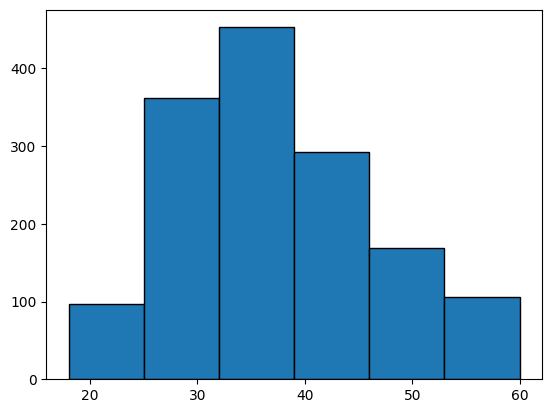

In [15]:
plt.hist(df.Age,bins = 6,edgecolor='black')
plt.show()

(array([148., 141., 139., 171., 141., 148., 128., 163., 158., 143.]),
 array([ 102. ,  241.7,  381.4,  521.1,  660.8,  800.5,  940.2, 1079.9,
        1219.6, 1359.3, 1499. ]),
 <BarContainer object of 10 artists>)

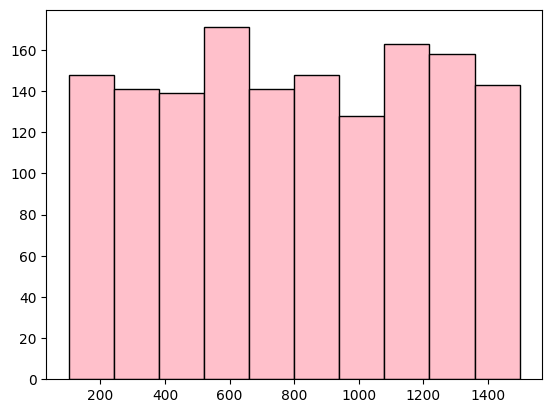

In [16]:
plt.hist(df.DailyRate,color ='pink',bins = 10,edgecolor='black')

(array([172.,   0., 283.,   0.,   0., 578.,   0., 399.,   0.,  48.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

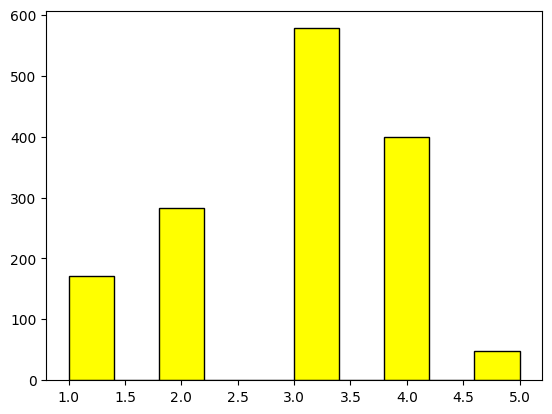

In [17]:
plt.hist(df.Education,edgecolor='black',color = 'yellow')

(array([   0.,    0.,    0.,    0.,    0., 1480.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

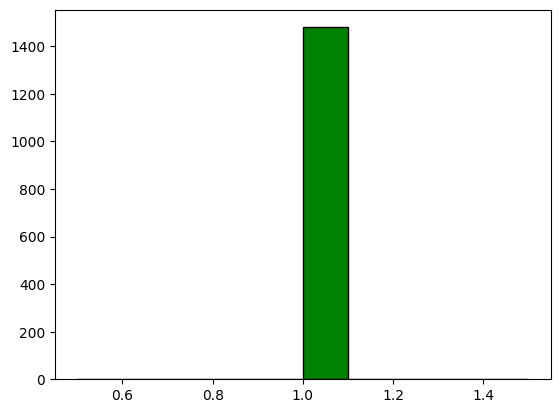

In [18]:
plt.hist(df.EmployeeCount,edgecolor='black',color = 'green')

(array([155., 148., 160., 135., 148., 141., 141., 148., 150., 154.]),
 array([1.0000e+00, 2.0770e+02, 4.1440e+02, 6.2110e+02, 8.2780e+02,
        1.0345e+03, 1.2412e+03, 1.4479e+03, 1.6546e+03, 1.8613e+03,
        2.0680e+03]),
 <BarContainer object of 10 artists>)

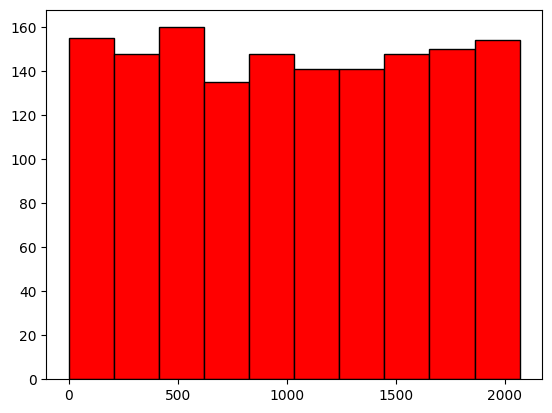

In [19]:
plt.hist(df.EmployeeNumber,edgecolor='black',color = 'red',bins = 10)

(array([147., 161., 155., 148., 147., 146., 140., 158., 159., 119.]),
 array([ 2094. ,  4584.5,  7075. ,  9565.5, 12056. , 14546.5, 17037. ,
        19527.5, 22018. , 24508.5, 26999. ]),
 <BarContainer object of 10 artists>)

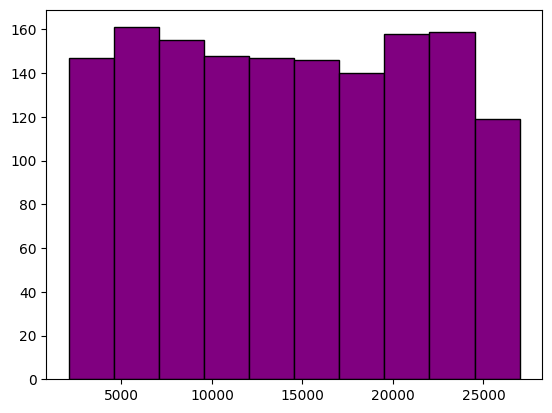

In [20]:
plt.hist(df.MonthlyRate,edgecolor='black',color = 'purple')

(array([504., 192., 250., 135.,  40.,  78.,  73.,  65.,  79.,  64.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <BarContainer object of 10 artists>)

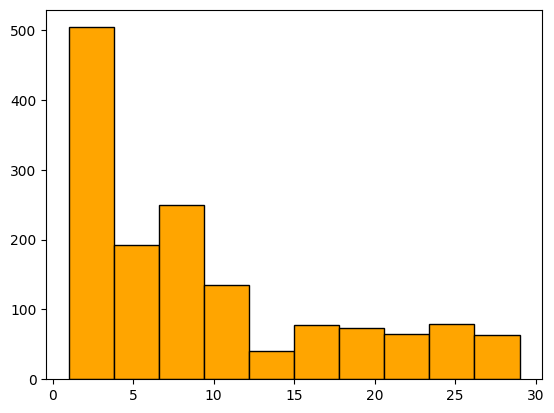

In [21]:
plt.hist(df.DistanceFromHome,edgecolor='black',color = 'orange')

(array([279., 307., 460., 434.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

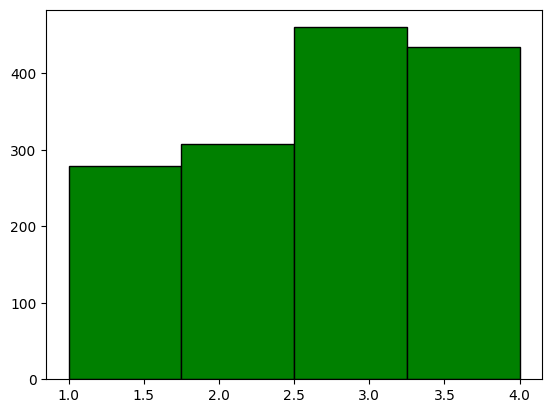

In [22]:
plt.hist(df.RelationshipSatisfaction,edgecolor='black',color = 'green',bins=4)

(array([165., 361., 439., 155., 121., 109.,  53.,  40.,  24.,  13.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

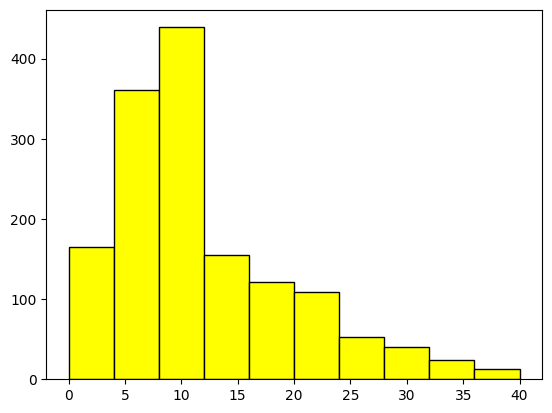

In [23]:
plt.hist(df.TotalWorkingYears,edgecolor='black',color = 'yellow')

(array([471., 478., 316.,  76.,  45.,  59.,  16.,   6.,   9.,   4.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

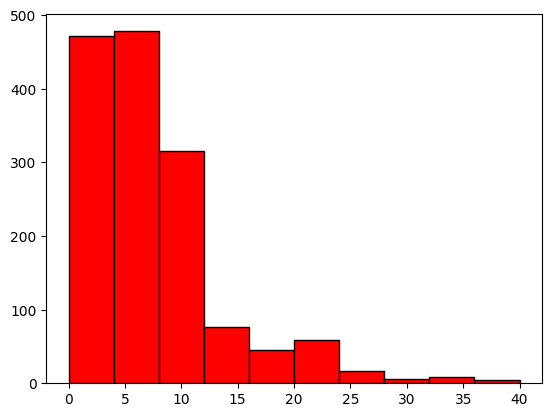

In [24]:
plt.hist(df.YearsAtCompany,edgecolor='black',color = 'red')

(array([946., 160., 113.,  45., 108.,  18.,  24.,  24.,  20.,  22.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

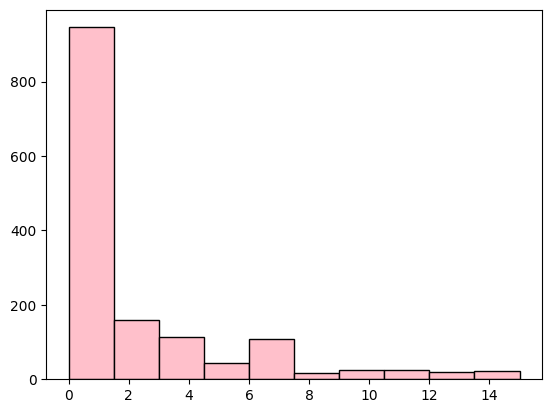

In [25]:
plt.hist(df.YearsSinceLastPromotion,edgecolor='black',color = 'pink')

(array([329., 469., 126.,  30., 311.,  88.,  21.,  31.,  10.,   8.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

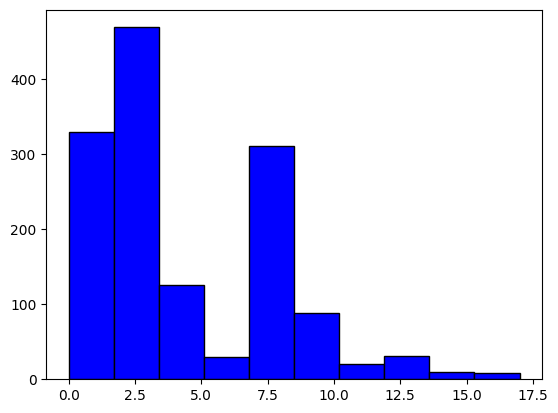

In [26]:
plt.hist(df.YearsWithCurrManager,edgecolor='black',color = 'blue')

(array([ 55.,  71., 550., 496., 123., 185.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

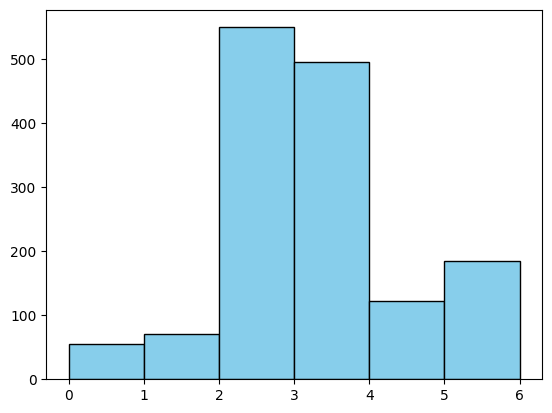

In [27]:
plt.hist(df.TrainingTimesLastYear,edgecolor='black',color = 'skyblue',bins=6)

(array([ 81., 346., 899., 154.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 <BarContainer object of 4 artists>)

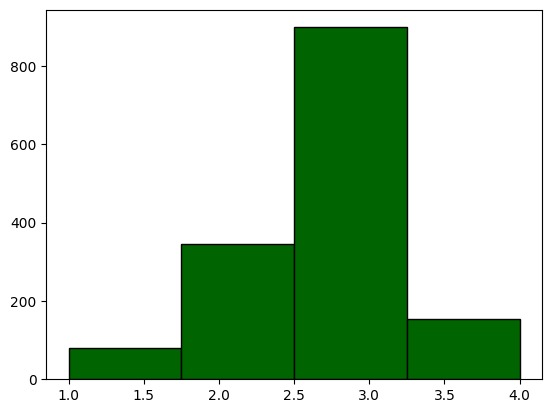

In [28]:

plt.hist(df.WorkLifeBalance,edgecolor='black',color = 'darkgreen',bins =4)

(array([301., 512., 142., 261.,  89.,  97.,  32.,  25.,  15.,   6.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

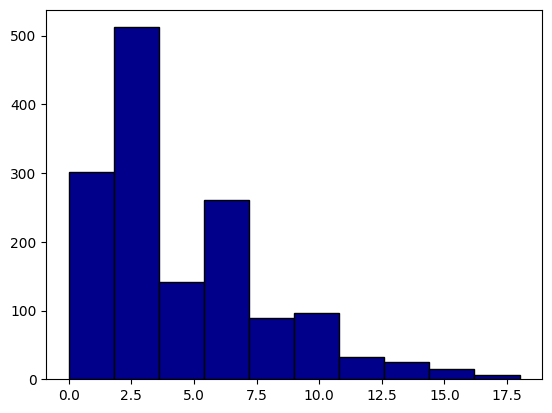

In [29]:
plt.hist(df.YearsInCurrentRole,edgecolor='black',color = 'darkblue')

In [30]:
age_att = df.groupby('Age')['Attrition'].value_counts()

In [31]:
age_att

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: count, Length: 82, dtype: int64

In [33]:
age_att=df.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(age_att,x='Age',y='Counts',color='Attrition',title='Agewise Counts of People in an Organization')

In [34]:
df.Department.value_counts()


Department
Research & Development    967
Sales                     450
Human Resources            63
Name: count, dtype: int64

In [40]:
department_attrition = df.groupby(['Department','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig=px.bar(department_attrition,x='Department',y='Counts',color='Attrition',title='Department wise Counts of People in an Organization')
fig.show()

In [42]:
environment_satisfaction = df.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.area(environment_satisfaction,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

In [43]:
df.JobSatisfaction.value_counts()

JobSatisfaction
4    461
3    444
1    293
2    282
Name: count, dtype: int64

In [46]:
job_satisfaction = df.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.area(job_satisfaction,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

In [47]:
df.WorkLifeBalance.value_counts()

WorkLifeBalance
3    899
2    346
4    154
1     81
Name: count, dtype: int64

In [50]:
work_life_balance = df.groupby(['WorkLifeBalance','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.bar(work_life_balance,x='WorkLifeBalance',y='Counts',color='Attrition',title='Work Life Balance level Counts of People in an Organization')

In [51]:
df.NumCompaniesWorked.value_counts()

NumCompaniesWorked
1    523
0    200
3    159
2    148
4    142
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [52]:
num_companies_worked = df.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name = 'Counts')
px.bar(num_companies_worked,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Number of Companies Worked Counts of People in an Organization')

In [53]:
df.YearsInCurrentRole.value_counts()

YearsInCurrentRole
2     376
0     244
7     223
3     136
4     106
8      89
9      68
1      57
6      38
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

In [57]:
years_in_current_role=df.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(years_in_current_role,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Counts of People working for years in an Organization')

In [59]:
percent_salary_hike=df.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(percent_salary_hike,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization')

In [60]:
year_with_current_manager=df.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(year_with_current_manager,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

In [61]:
df.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [62]:
for column in df.columns:
  print(f"{column}: number of unique value {df[column].nunique()}")



EmpID: number of unique value 1470
Age: number of unique value 43
AgeGroup: number of unique value 5
Attrition: number of unique value 2
BusinessTravel: number of unique value 4
DailyRate: number of unique value 886
Department: number of unique value 3
DistanceFromHome: number of unique value 29
Education: number of unique value 5
EducationField: number of unique value 6
EmployeeCount: number of unique value 1
EmployeeNumber: number of unique value 1470
EnvironmentSatisfaction: number of unique value 4
Gender: number of unique value 2
HourlyRate: number of unique value 71
JobInvolvement: number of unique value 4
JobLevel: number of unique value 5
JobRole: number of unique value 9
JobSatisfaction: number of unique value 4
MaritalStatus: number of unique value 3
MonthlyIncome: number of unique value 1349
SalarySlab: number of unique value 4
MonthlyRate: number of unique value 1427
NumCompaniesWorked: number of unique value 10
Over18: number of unique value 1
OverTime: number of unique va

In [63]:
df['Attrition'].value_counts()

Attrition
No     1242
Yes     238
Name: count, dtype: int64

In [64]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [65]:
df.dropna(inplace=True)

In [66]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [67]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [68]:
df['Attrition'] = l.fit_transform(df['Attrition'])
df['BusinessTravel'] = l.fit_transform(df['BusinessTravel'])
df['Department'] = l.fit_transform(df['Department'])
df['EducationField'] = l.fit_transform(df['EducationField'])
df['Gender'] = l.fit_transform(df['Gender'])
df['JobRole'] = l.fit_transform(df['JobRole'])
df['MaritalStatus'] = l.fit_transform(df['MaritalStatus'])
df['SalarySlab'] = l.fit_transform(df['SalarySlab'])

In [69]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,1,3,230,1,3,3,1,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,0,3,812,2,10,3,3,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,1,2,1306,2,5,3,2,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,0,0,287,1,5,2,1,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,1,0,247,1,8,1,3,...,4,80,0,0,0,3,0,0,0,0.0


In [70]:
df.drop(['EmpID','AgeGroup','EmployeeCount','Over18','OverTime','StandardHours'],axis = 1,inplace=True)

In [71]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,1,3,230,1,3,3,1,405,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,0,3,812,2,10,3,3,411,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,1,2,1306,2,5,3,2,614,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,0,0,287,1,5,2,1,1012,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,1,0,247,1,8,1,3,1156,3,...,3,4,0,0,0,3,0,0,0,0.0


In [72]:
df.dtypes

Age                           int64
Attrition                     int64
BusinessTravel                int64
DailyRate                     int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                        int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int64
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome                 int64
SalarySlab                    int64
MonthlyRate                   int64
NumCompaniesWorked            int64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance             

In [73]:
X = df.drop('Attrition',axis = 1)
y = df['Attrition']

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [75]:
len(X_train)

1138

In [76]:
len(X_test)


285

In [77]:
len(y_train)

1138

In [78]:
len(y_test)

285

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:

model.score(X_test,y_test)

0.1243046152782481

In [82]:
model_1 = LogisticRegression(C=1000,max_iter=10000)

In [83]:
model_1.fit(X_train,y_train)

LogisticRegression(C=1000, max_iter=10000)

In [84]:
model_1.score(X_test,y_test)

0.8385964912280702

In [85]:
model_2=tree.DecisionTreeClassifier()

In [86]:

model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
model_2.score(X_test,y_test)

0.7614035087719299

In [88]:

model_3=RandomForestClassifier()#n_estimators increases the model score
model_3.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
model_3.score(X_test,y_test)

0.8421052631578947

In [90]:
# Make predictions
from sklearn.metrics import accuracy_score
y_pred = model_3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8421052631578947
